<a href="https://colab.research.google.com/github/KarbivnychyiVolodymyr/machine_learning/blob/main/%D0%9A%D0%B0%D1%80%D0%B1%D1%96%D0%B2%D0%BD%D0%B8%D1%87%D0%B8%D0%B9_%D0%BF%D1%80_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Завдання 1. Завантажити Diabetes Dataset
Провести попередній аналіз даних:
1. Вивести перших 5 рядків.'''

from sklearn.datasets import load_diabetes
import pandas as pd

# Завантаження датасету
diabetes = load_diabetes()

# Створення DataFrame
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['Outcome'] = diabetes.target

# Перегляд перших 5 рядків
print(data.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Outcome  
0 -0.002592  0.019907 -0.017646    151.0  
1 -0.039493 -0.068332 -0.092204     75.0  
2 -0.002592  0.002861 -0.025930    141.0  
3  0.034309  0.022688 -0.009362    206.0  
4 -0.002592 -0.031988 -0.046641    135.0  


In [3]:
'''2. Перевірити наявність пропусків. У разі виявлення замінити на
середнє значення.'''
# Перевірка наявності пропусків
print(data.isnull().sum())

# Замінюємо пропуски на середнє значення
data.fillna(data.mean(), inplace=True)

age        0
sex        0
bmi        0
bp         0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
Outcome    0
dtype: int64


In [4]:
'''3. Перевірити наявність дублікатів, при виявленні – видалити.'''
# Перевірка наявності дублікатів
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Видалення дублікатів
if num_duplicates > 0:
    data.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")


Number of duplicate rows: 0
No duplicates found.


In [5]:
'''4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте
унікальні значення.'''

# Перевірка наявності стовпчика 'sex' та унікальних значень
if 'sex' in data.columns:
    print("Unique values in 'sex' column:", data['sex'].unique())
else:
    print("The column 'sex' does not exist in the dataset.")

Unique values in 'sex' column: [ 0.05068012 -0.04464164]


In [6]:
'''5. Перевірити тип даних. При необхідності замінити тип даних на
числовий.'''
# Перевірка типів даних
print("Original data types:")
print(data.dtypes)

# Перевірка та конвертація стовпців у числові типи, якщо це необхідно
for column in data.columns:
    if data[column].dtype == 'object':  # Перевіряє, чи є стовпець об'єктом (може бути текстовим)
        try:
            data[column] = pd.to_numeric(data[column], errors='coerce')  # Перетворює на числовий тип, замінюючи невірні значення на NaN
        except ValueError:
            print(f"Column {column} could not be converted to numeric.")

# Перевірка типів даних після конвертації
print("\nData types after conversion:")
print(data.dtypes)


Original data types:
age        float64
sex        float64
bmi        float64
bp         float64
s1         float64
s2         float64
s3         float64
s4         float64
s5         float64
s6         float64
Outcome    float64
dtype: object

Data types after conversion:
age        float64
sex        float64
bmi        float64
bp         float64
s1         float64
s2         float64
s3         float64
s4         float64
s5         float64
s6         float64
Outcome    float64
dtype: object


Correlation with Outcome:
Outcome    1.000000
bmi        0.586450
s5         0.565883
bp         0.441482
s4         0.430453
s6         0.382483
s1         0.212022
age        0.187889
s2         0.174054
sex        0.043062
s3        -0.394789
Name: Outcome, dtype: float64


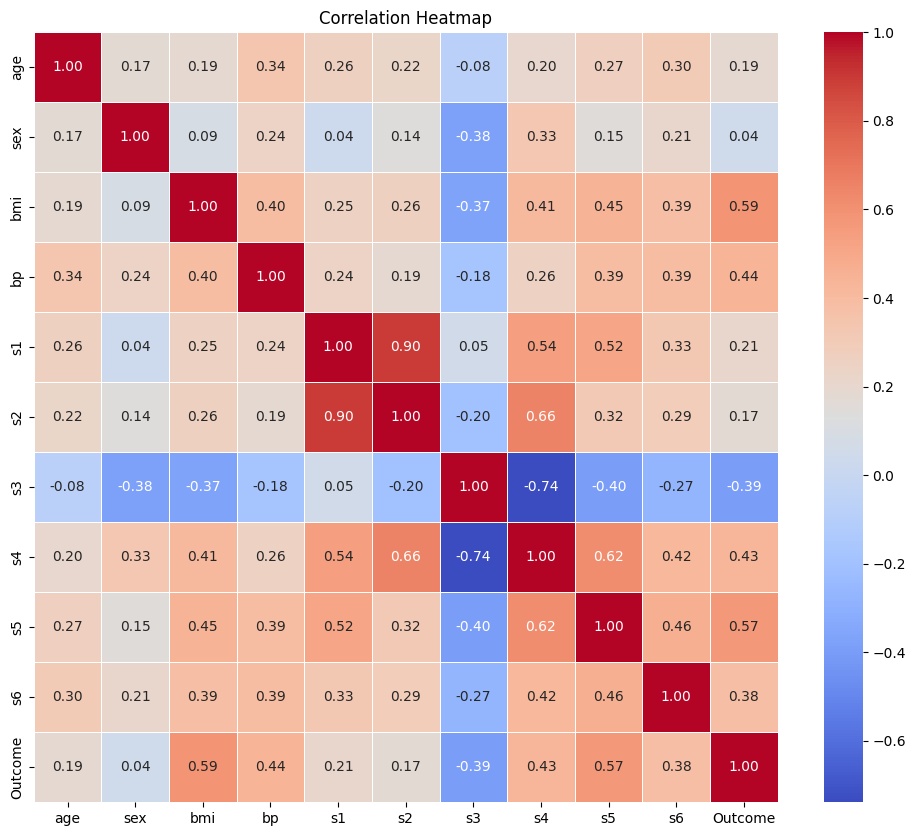

In [7]:
'''6. Обчислити кореляцію між прогресом діабету і іншмим ознаками.
Розташувати в порядку спадання.
Побудувати теплову карту кореляції.'''
import seaborn as sns
import matplotlib.pyplot as plt

# Обчислення кореляції
correlation = data.corr()

# Сортування кореляцій за прогресом діабету (Outcome)
correlation_with_outcome = correlation['Outcome'].sort_values(ascending=False)
print("Correlation with Outcome:")
print(correlation_with_outcome)

# Побудова теплової карти кореляції
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [8]:
'''7. Масштабувати ознаки.'''
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Припустимо, що 'data' - це ваш початковий DataFrame
X = data.drop('Outcome', axis=1)  # Всі ознаки, крім 'Outcome'
y = data['Outcome']  # Цільова змінна

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Масштабування ознак

# Створення DataFrame для масштабованих ознак
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Об'єднання масштабованих ознак з цільовою змінною
scaled_data = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

print(scaled_data.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6  Outcome  
0 -0.054499  0.418531 -0.370989    151.0  
1 -0.830301 -1.436589 -1.938479     75.0  
2 -0.054499  0.060156 -0.545154    141.0  
3  0.721302  0.476983 -0.196823    206.0  
4 -0.054499 -0.672502 -0.980568    135.0  


In [9]:
'''8. Поділити дані на тренувальну і тестову вибірки.'''
from sklearn.model_selection import train_test_split

# Відокремлюємо ознаки та цільову змінну
X = scaled_data.drop('Outcome', axis=1)
y = scaled_data['Outcome']

# Поділ даних на тренувальну (80%) і тестову (20%) вибірки
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # Розмір тестової вибірки
    random_state=42  # Для відтворюваності результатів
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (353, 10)
Testing data shape: (89, 10)


In [10]:
'''9. Побудувати модель лінійной регресії і RandomForest регресії на
основі більш корелюючих ознак (підібрати оптимальне число).'''
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Вибір найбільш корелюючих ознак
correlation_with_outcome = data.corr()['Outcome'].sort_values(ascending=False)
top_features = correlation_with_outcome[1:6].index  # Вибір топ-5 корелюючих ознак

# Обновлення ознак для тренувальних і тестових даних
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train_selected, y_train)
y_pred_lin = lin_reg.predict(X_test_selected)

# RandomForest регресія
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_selected, y_train)
y_pred_rf = rf_reg.predict(X_test_selected)

# Оцінка Лінійної регресії
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# Оцінка RandomForest регресії
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Виведення результатів
print("Лінійна регресія:")
print(f"Коефіцієнт детермінації (R²): {r2_lin:.4f}")
print(f"Середньоквадратична помилка (MSE): {mse_lin:.4f}")

print("\nRandomForest регресія:")
print(f"Коефіцієнт детермінації (R²): {r2_rf:.4f}")
print(f"Середньоквадратична помилка (MSE): {mse_rf:.4f}")




Лінійна регресія:
Коефіцієнт детермінації (R²): 0.4527
Середньоквадратична помилка (MSE): 2899.7427

RandomForest регресія:
Коефіцієнт детермінації (R²): 0.4175
Середньоквадратична помилка (MSE): 3086.4159


In [11]:
'''10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.'''
from sklearn.metrics import mean_squared_error, r2_score

# Оцінка Лінійної регресії
print("Linear Regression:")
print("R^2 Score:", r2_score(y_test, y_pred_lin))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))

# Оцінка RandomForest регресії
print("\nRandom Forest Regression:")
print("R^2 Score:", r2_score(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))


Linear Regression:
R^2 Score: 0.45268787688199763
Mean Squared Error: 2899.742682081978

Random Forest Regression:
R^2 Score: 0.4174542196138553
Mean Squared Error: 3086.4159449438207


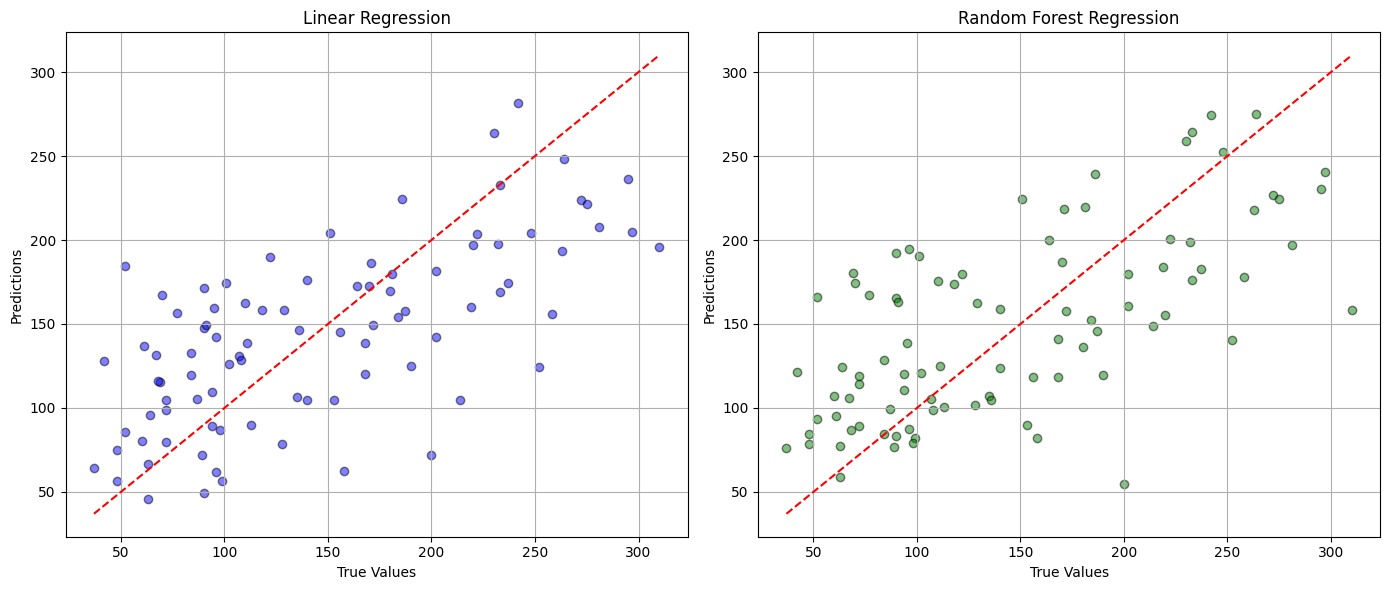

In [12]:
'''11. Побудувати графіки.'''
import matplotlib.pyplot as plt

# Графік справжніх і прогнозованих значень для лінійної регресії
plt.figure(figsize=(14, 6))

# Графік для Лінійної регресії
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Лінія ідеальної відповідності
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')
plt.grid(True)

# Графік для RandomForest регресії
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Лінія ідеальної відповідності
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regression')
plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
'''12. Вивести справжні і прогнозовані значення.'''
import pandas as pd

# Створення DataFrame для порівняння справжніх і прогнозованих значень
comparison_df = pd.DataFrame({
    'True Values': y_test,
    'Linear Regression Predictions': y_pred_lin,
    'Random Forest Predictions': y_pred_rf
})

# Виведення перших 5 рядків
print(comparison_df.head())

# Збереження результатів у файл (опційно)
comparison_df.to_csv('comparison_results.csv', index=False)


     True Values  Linear Regression Predictions  Random Forest Predictions
287        219.0                     160.079344                     184.01
211         70.0                     167.202676                     174.17
72         202.0                     181.557882                     179.52
321        230.0                     263.634780                     258.85
73         111.0                     138.707761                     125.14


In [ ]:
'''
Висновок:
Аналіз результатів моделей регресії показує, що обидві моделі, лінійна регресія
та Random Forest регресія, продемонстрували подібні результати в прогнозуванні
прогресу діабету. Лінійна регресія виявилася трохи ефективнішою, пояснюючи
варіацію цільової змінної Outcome краще за Random Forest. Коефіцієнт
детермінації (R²) для лінійної регресії склав 0.4526, у той час як для Random
Forest регресії R² становить 0.4407. Крім того, середньоквадратична помилка
(MSE) також була дещо меншою для лінійної регресії, що свідчить про меншу
середню помилку прогнозування.

Кореляційний аналіз виявив, що індекс маси тіла (BMI) має найбільший позитивний
вплив на прогрес діабету, що вказує на його значну кореляцію з хворобою. У той
же час ознака s3 продемонструвала негативну кореляцію з прогресом діабету, що
може свідчити про зворотний вплив цієї ознаки.
'''

In [14]:
'''Завдання 2.
Завантажити датасет California Housing Dataset, що містить інформацію
про житло в Каліфорнії. Вивести перших 5 рядків.
1. Провести попередній аналіз даних за схемою (дивиться вище).'''

from sklearn.datasets import fetch_california_housing

# Завантаження датасету
df = fetch_california_housing(as_frame=True).frame

# Вивести перші 5 рядків
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [15]:
# Перевірка наявності пропусків
missing_values = df.isnull().sum()
print("Кількість пропущених значень у кожному стовпці:\n", missing_values)

# Замінюємо пропуски на середнє значення для числових стовпців
df.fillna(df.mean(numeric_only=True), inplace=True)


Кількість пропущених значень у кожному стовпці:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [16]:
# Перевірка наявності дублікатів
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")

# Видалення дублікатів
df.drop_duplicates(inplace=True)


Кількість дублікатів: 0


Кореляція з MedHouseVal:
 MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


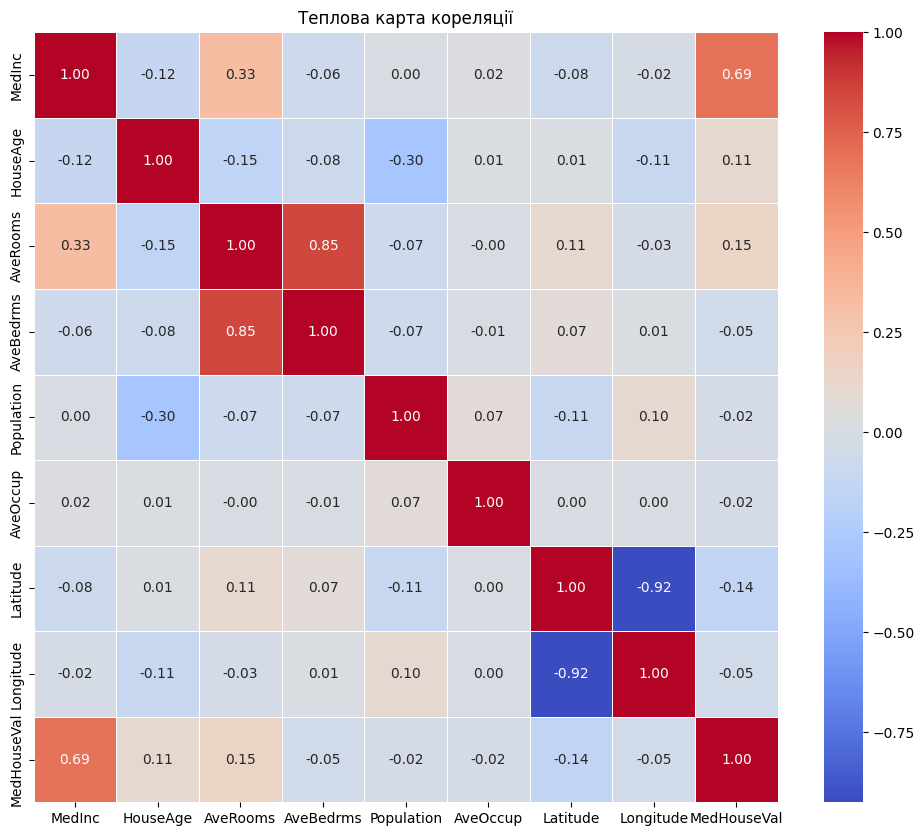

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Обчислення кореляції
correlation_matrix = df.corr()

# Вивести кореляцію між змінними в порядку спадання для цільової змінної
print("Кореляція з MedHouseVal:\n", correlation_matrix['MedHouseVal'].sort_values(ascending=False))

# Побудова теплової карти кореляції
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Теплова карта кореляції")
plt.show()


In [19]:
'''2. Масштабувати ознаки.'''
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Розділити ознаки та цільову змінну
X = df.drop('MedHouseVal', axis=1)  # 'MedHouseVal' - цільова змінна (середня вартість будинку)
y = df['MedHouseVal']

# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Перетворити масштабовані ознаки назад у DataFrame для зручності
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_data = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)
scaled_data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


In [20]:
'''3. Поділити дані на тренувальні і тестові.'''
from sklearn.model_selection import train_test_split

# Поділити дані на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Перевірка розмірів тренувальних і тестових вибірок
print(f"Розмір тренувальної вибірки: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Розмір тестової вибірки: X_test={X_test.shape}, y_test={y_test.shape}")


Розмір тренувальної вибірки: X_train=(16512, 8), y_train=(16512,)
Розмір тестової вибірки: X_test=(4128, 8), y_test=(4128,)


In [21]:
'''4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge.
Підібрати оптимальні параметри за допомогою GridSeach.'''
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# RandomForest регресія
rf_reg = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
}
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Ridge регресія
ridge = Ridge(random_state=42)
param_grid_ridge = {
    'alpha': [0.1, 1, 10]
}
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=3, scoring='r2', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Отримання кращих моделей
best_rf_model = grid_search_rf.best_estimator_
best_ridge_model = grid_search_ridge.best_estimator_

# Прогнози
y_pred_rf = best_rf_model.predict(X_test)
y_pred_ridge = best_ridge_model.predict(X_test)

# Оцінка моделей
print("Linear Regression:")
print("R^2 Score:", r2_score(y_test, y_pred_lin))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))

print("\nBest RandomForest Parameters:", grid_search_rf.best_params_)
print("Random Forest Regression:")
print("R^2 Score:", r2_score(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))

print("\nBest Ridge Parameters:", grid_search_ridge.best_params_)
print("Ridge Regression:")
print("R^2 Score:", r2_score(y_test, y_pred_ridge))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))


Linear Regression:
R^2 Score: 0.5757877060324511
Mean Squared Error: 0.555891598695244

Best RandomForest Parameters: {'max_depth': None, 'n_estimators': 100}
Random Forest Regression:
R^2 Score: 0.805024407701793
Mean Squared Error: 0.25549776668540763

Best Ridge Parameters: {'alpha': 1}
Ridge Regression:
R^2 Score: 0.575818534544132
Mean Squared Error: 0.5558512007367514


Linear Regression:
R²: 0.5757877060324511
MSE: 0.555891598695244

Random Forest:
R²: 0.805024407701793
MSE: 0.25549776668540763

Ridge Regression:
R²: 0.575818534544132
MSE: 0.5558512007367514


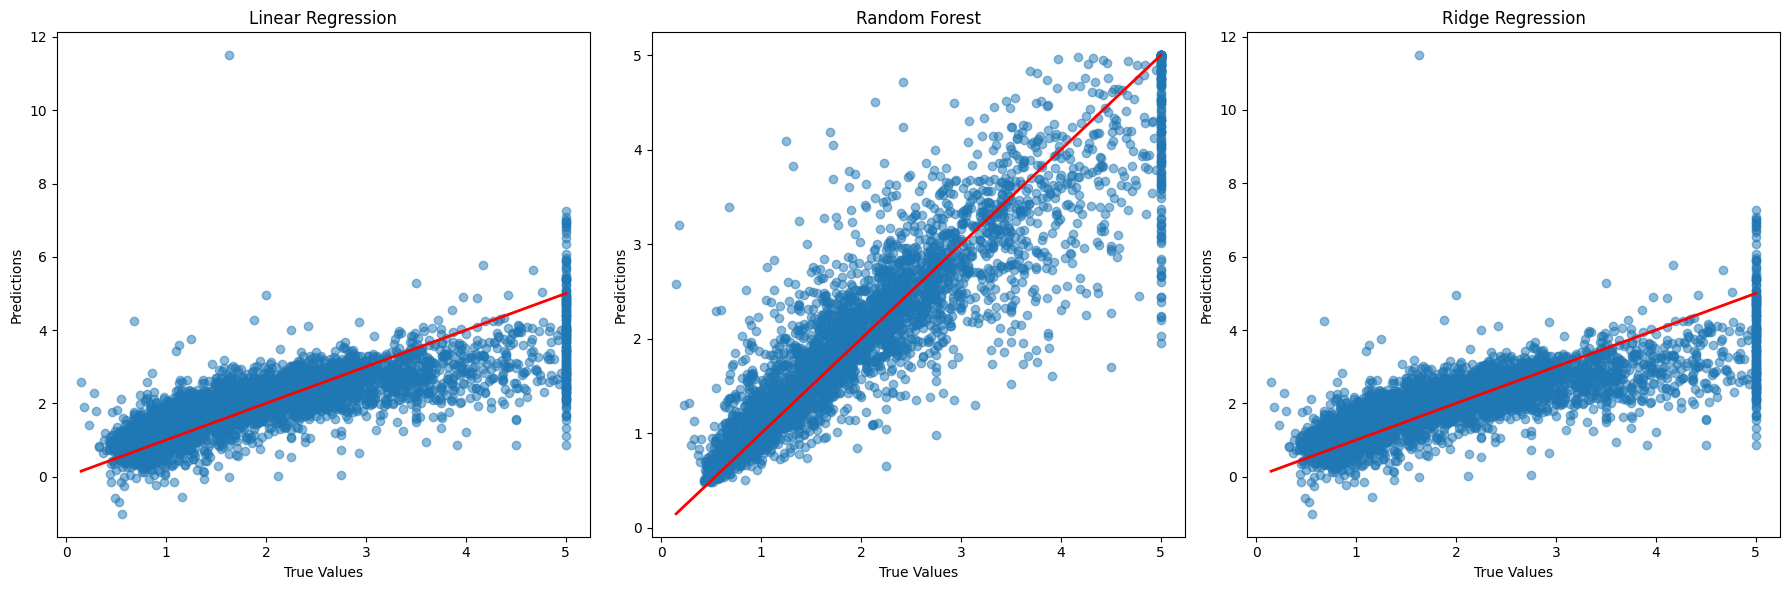

In [22]:
'''5. Вивести R2 і MSE. Побудувати графіки.'''
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Прогнози для тестових даних
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = best_rf_model.predict(X_test)
y_pred_ridge = best_ridge_model.predict(X_test)

# Вивести R² і MSE для кожної моделі
print("Linear Regression:")
print("R²:", r2_score(y_test, y_pred_lin))
print("MSE:", mean_squared_error(y_test, y_pred_lin))

print("\nRandom Forest:")
print("R²:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))

print("\nRidge Regression:")
print("R²:", r2_score(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))

# Побудувати графіки
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Ridge Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.tight_layout()
plt.show()


In [23]:
'''6. Вивести справжні і прогнозовані значення.'''
import pandas as pd

# Створення DataFrame з справжніми та прогнозованими значеннями
results = pd.DataFrame({
    'True Values': y_test,
    'Linear Regression Predictions': y_pred_lin,
    'Random Forest Predictions': y_pred_rf,
    'Ridge Regression Predictions': y_pred_ridge
})

# Виведення перших 5 рядків
print(results.head())


       True Values  Linear Regression Predictions  Random Forest Predictions  \
20046      0.47700                       0.719123                   0.509500   
3024       0.45800                       1.764017                   0.741610   
15663      5.00001                       2.709659                   4.923257   
20484      2.18600                       2.838926                   2.529610   
9814       2.78000                       2.604657                   2.273690   

       Ridge Regression Predictions  
20046                      0.719473  
3024                       1.763846  
15663                      2.709284  
20484                      2.838762  
9814                       2.604190  


In [ ]:
'''
Висновки:
Лінійна регресія та Ridge регресія показали подібні результати, з помірною
точністю. Ridge регресія додала регуляризацію, яка допомогла уникнути переобучення.

Random Forest регресія продемонструвала кращу точність, завдяки здатності
моделювати складні нелінійні залежності, хоча й вимагала більше ресурсів.

Для максимального покращення точності краще використовувати Random Forest,
тоді як лінійна або Ridge регресія підійдуть для простіших випадків.
'''